# Package import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
import os

In [2]:
plt.rcParams["font.family"] = "sans-serif"
path = os.getcwd()
path

'/Users/takara/Desktop/MPX/github/Code/Fig2'

# Classification of G1 or not

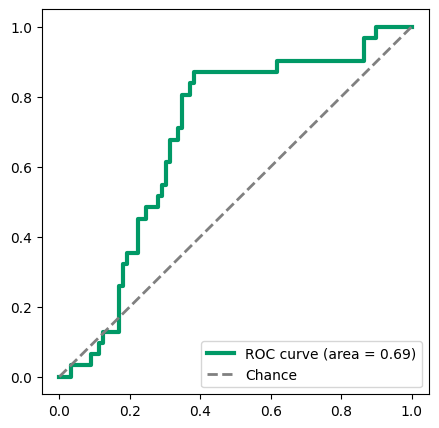

In [3]:
dsf = pd.read_csv("../../Data/vlonset.csv")
df = dsf.rename(columns={"G1": "target"})

y = df['target'].values
X = df["V0"].values.reshape(-1,1)

model = LogisticRegression(penalty="none",random_state=77,n_jobs=-1,verbose=0)
model.fit(X,y)
y_score = model.predict_proba(X)[:,1]

fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='#009966', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', label="Chance",lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.savefig(f"{path}/output/Fig2E.pdf",format="pdf",dpi=300,transparent=True)